## Decomposition of color Image

Color image contains 3 channels and we have to split 3 channels and apply wavelett transform to each channel and merge them

In [1]:
import numpy as np                   #numpy for arrays
import pywt                          #pywavelett library for waveletts
import matplotlib.image as mpimg     #matplotlib for visualization
import matplotlib.pyplot as plt      #matplotlib for plotting data
import cv2                           #OpenCv for ComputerVision and image properties
import copy

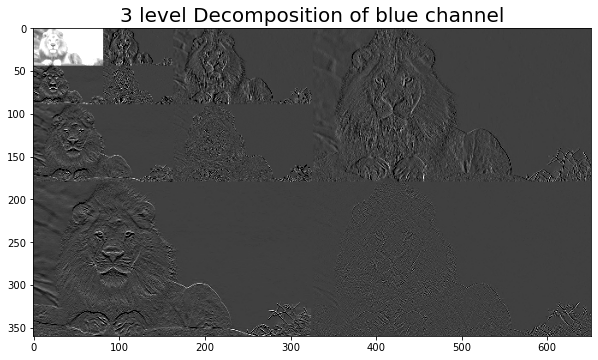

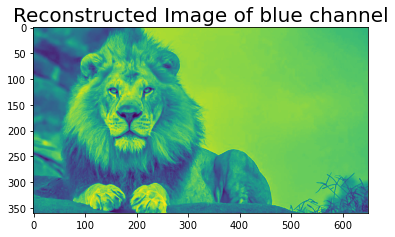

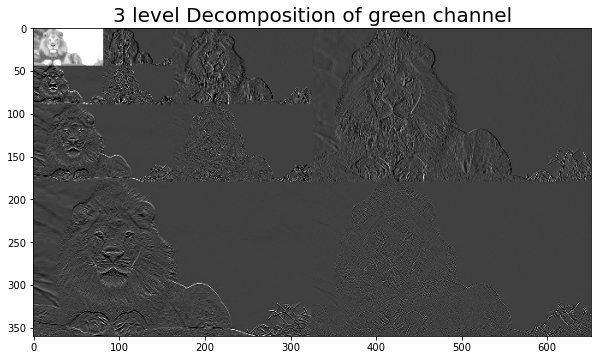

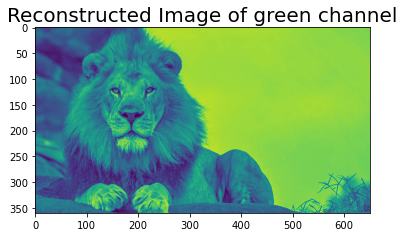

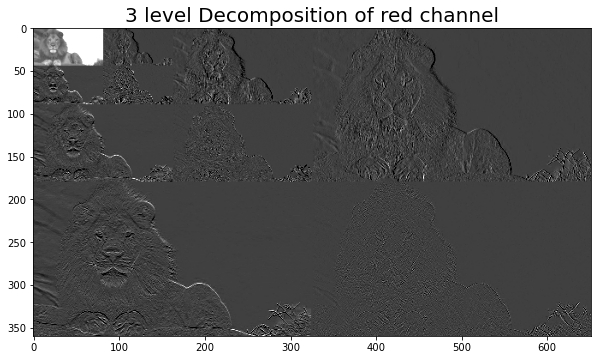

Text(0.5, 1.0, 'Final reconstruction of color image')

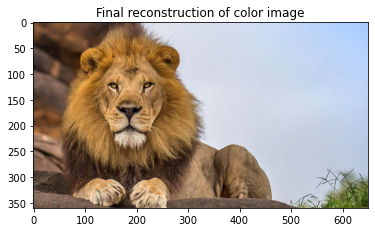

In [2]:
img = mpimg.imread(r"\Users\DELL\Desktop\lion.jpg")
n=3
w='db1'
b,g,r = cv2.split(img)
def DwtCompressionForColorImage(image,wavelett,level,channelname):
    coeffs = pywt.wavedec2(image,wavelet=wavelett,level=level)
    coeffsd = copy.deepcopy(coeffs)
    
    coeffs[0] /= np.abs(coeffs[0]).max()
    for eachlevel in range(level):
        coeffs[eachlevel + 1] = [d/(np.abs(d).max()) for d in coeffs[eachlevel + 1]]
    arr, s = pywt.coeffs_to_array(coeffs)
    plt.figure(figsize = (10,10))
    plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
    plt.title(str(level)+' level Decomposition of '+channelname+" channel",fontsize=20)
    plt.show()
    
    imgr = pywt.waverec2(coeffsd,'db1',mode = 'periodization')
    imgr = np.uint8(imgr)
    plt.imshow(imgr)
    plt.title('Reconstructed Image of '+channelname+" channel",fontsize=20)
    return imgr
    
bluerecon = DwtCompressionForColorImage(image = b,wavelett = w,level = n, channelname = "blue")
greenrecon = DwtCompressionForColorImage(image = g,wavelett = w,level = n, channelname = "green")
redrecon = DwtCompressionForColorImage(image = r,wavelett = w,level = n, channelname = "red")
finalrecon = cv2.merge([bluerecon,greenrecon,redrecon])
plt.imshow(finalrecon)
plt.title("Final reconstruction of color image")
